!ls *_longer.xvg

In [2]:
import numpy as np
import matplotlib.pyplot as plt

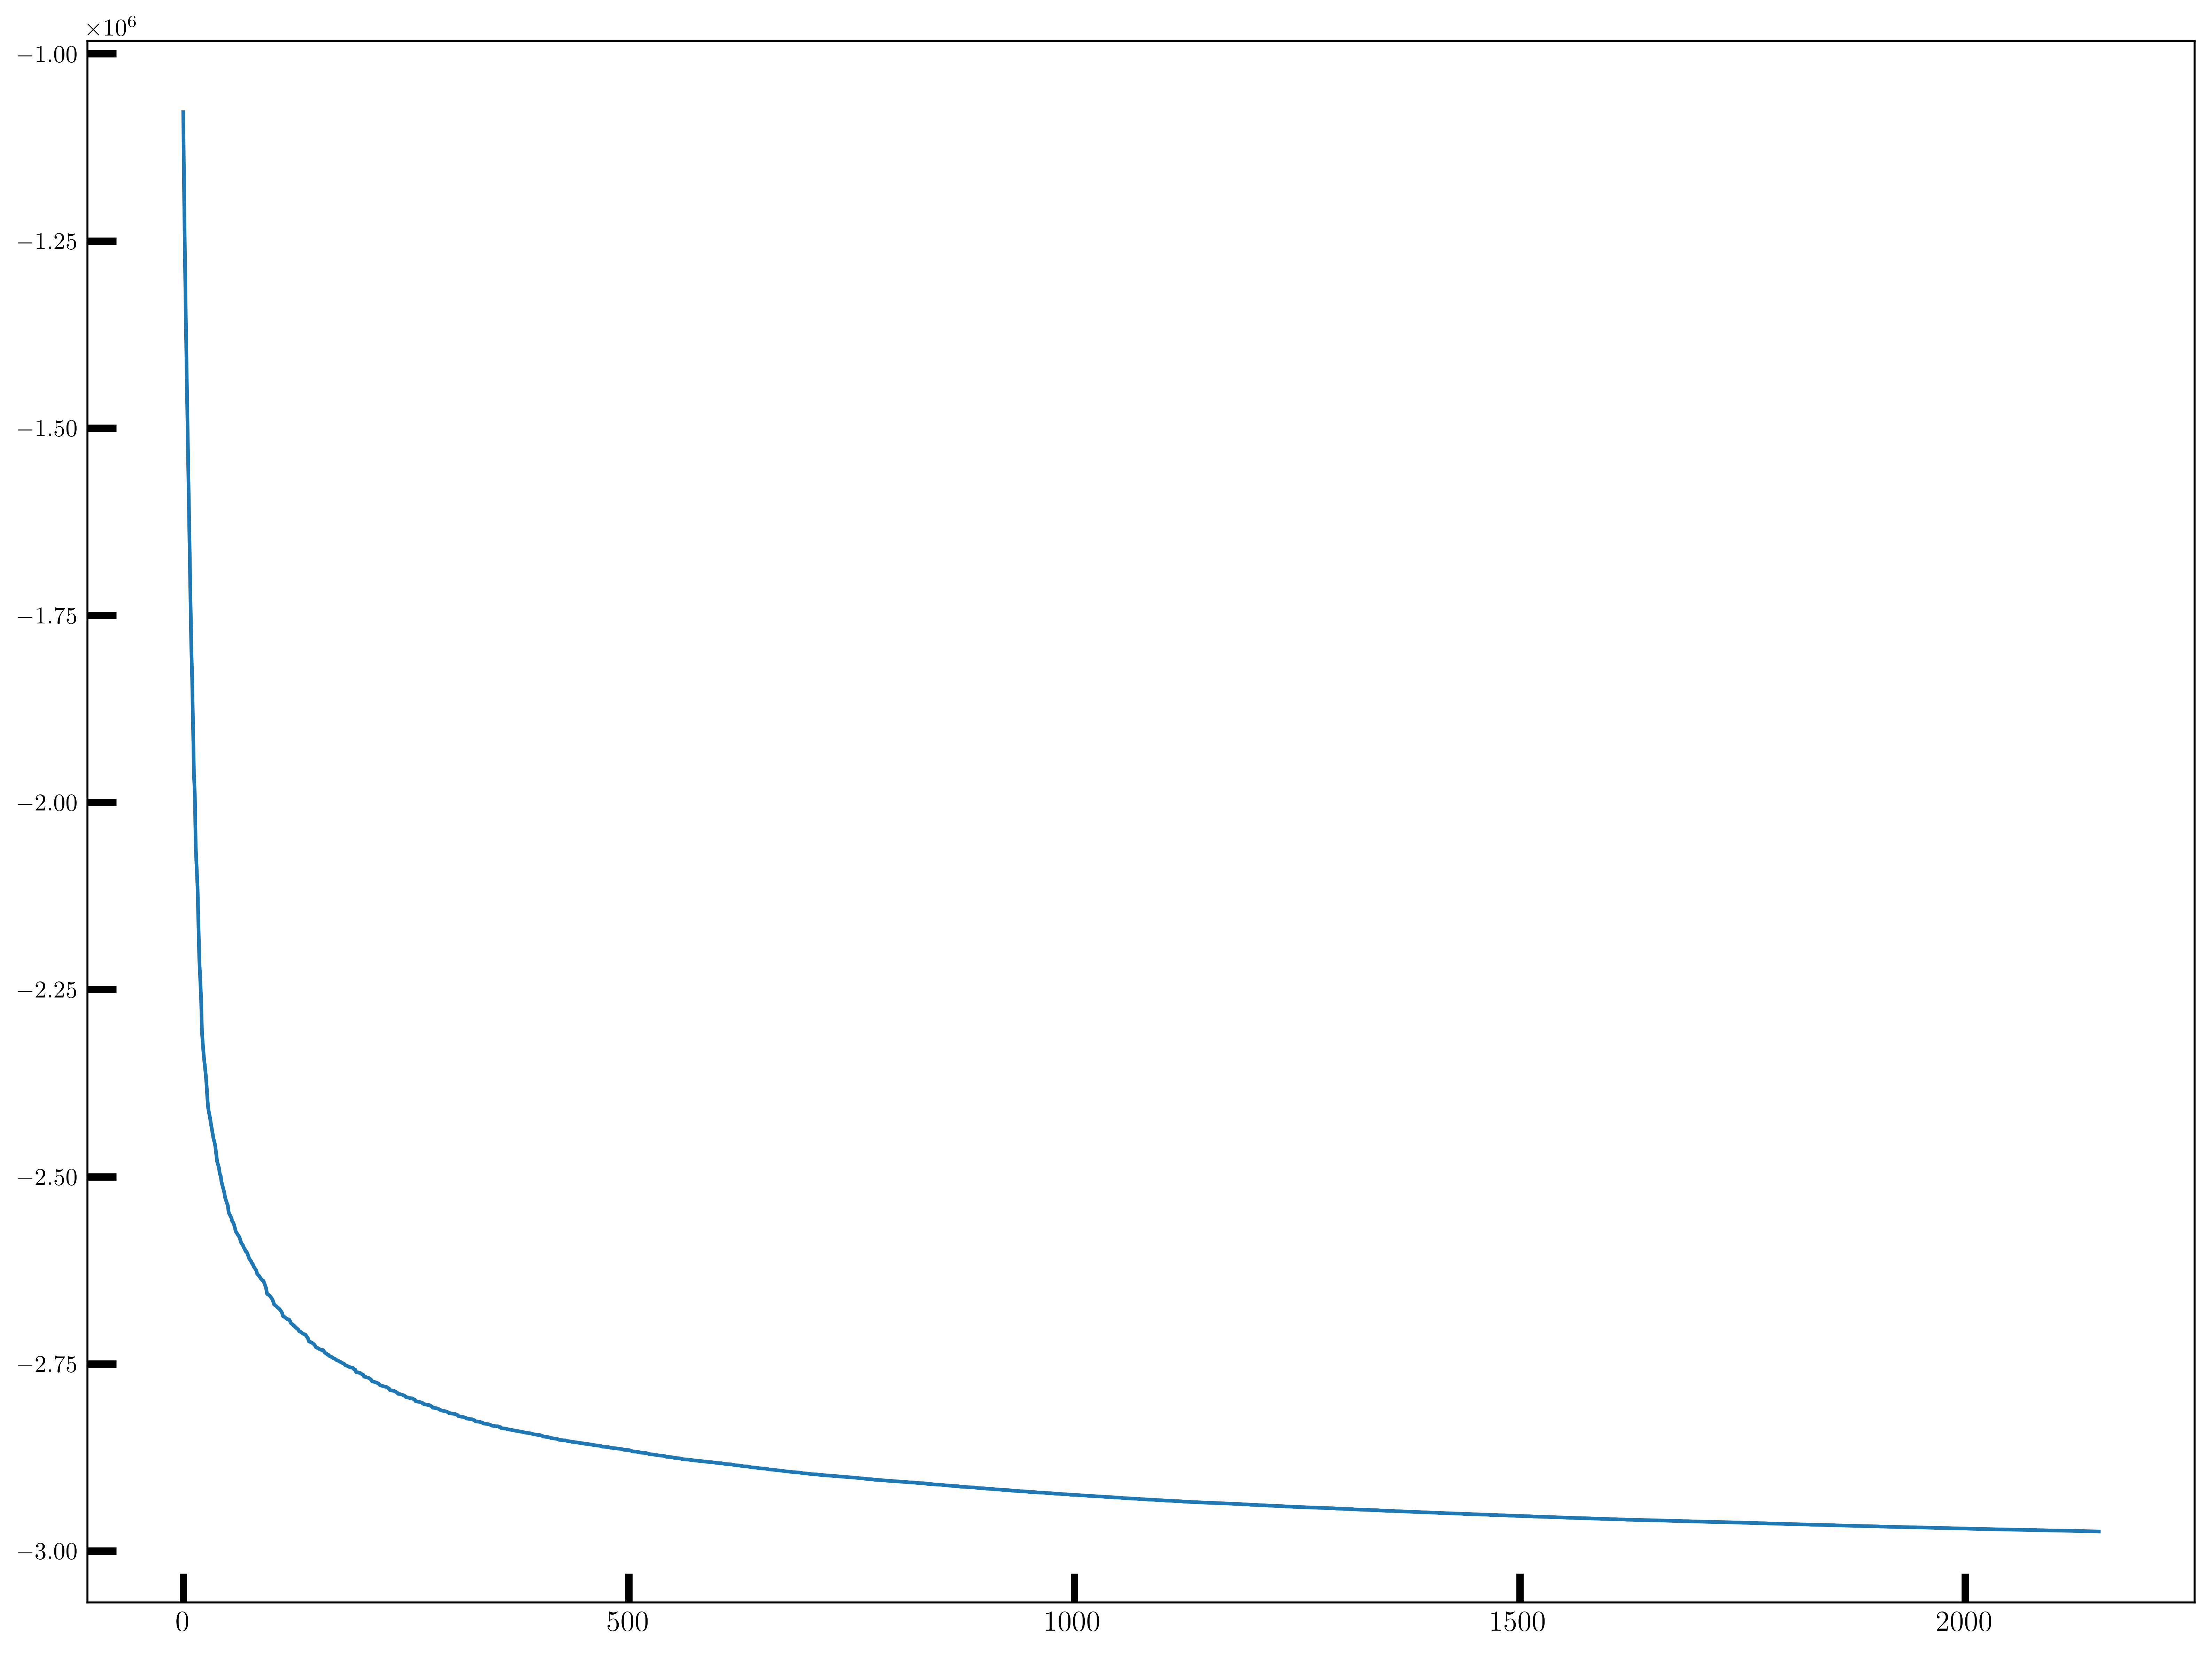

In [3]:
xvg_e = "potential.xvg"
x, e = np.loadtxt(xvg_e, comments=['#','@'], unpack=True)
plt.plot(x,e)

Text(0, 0.5, 'Temp (K)')

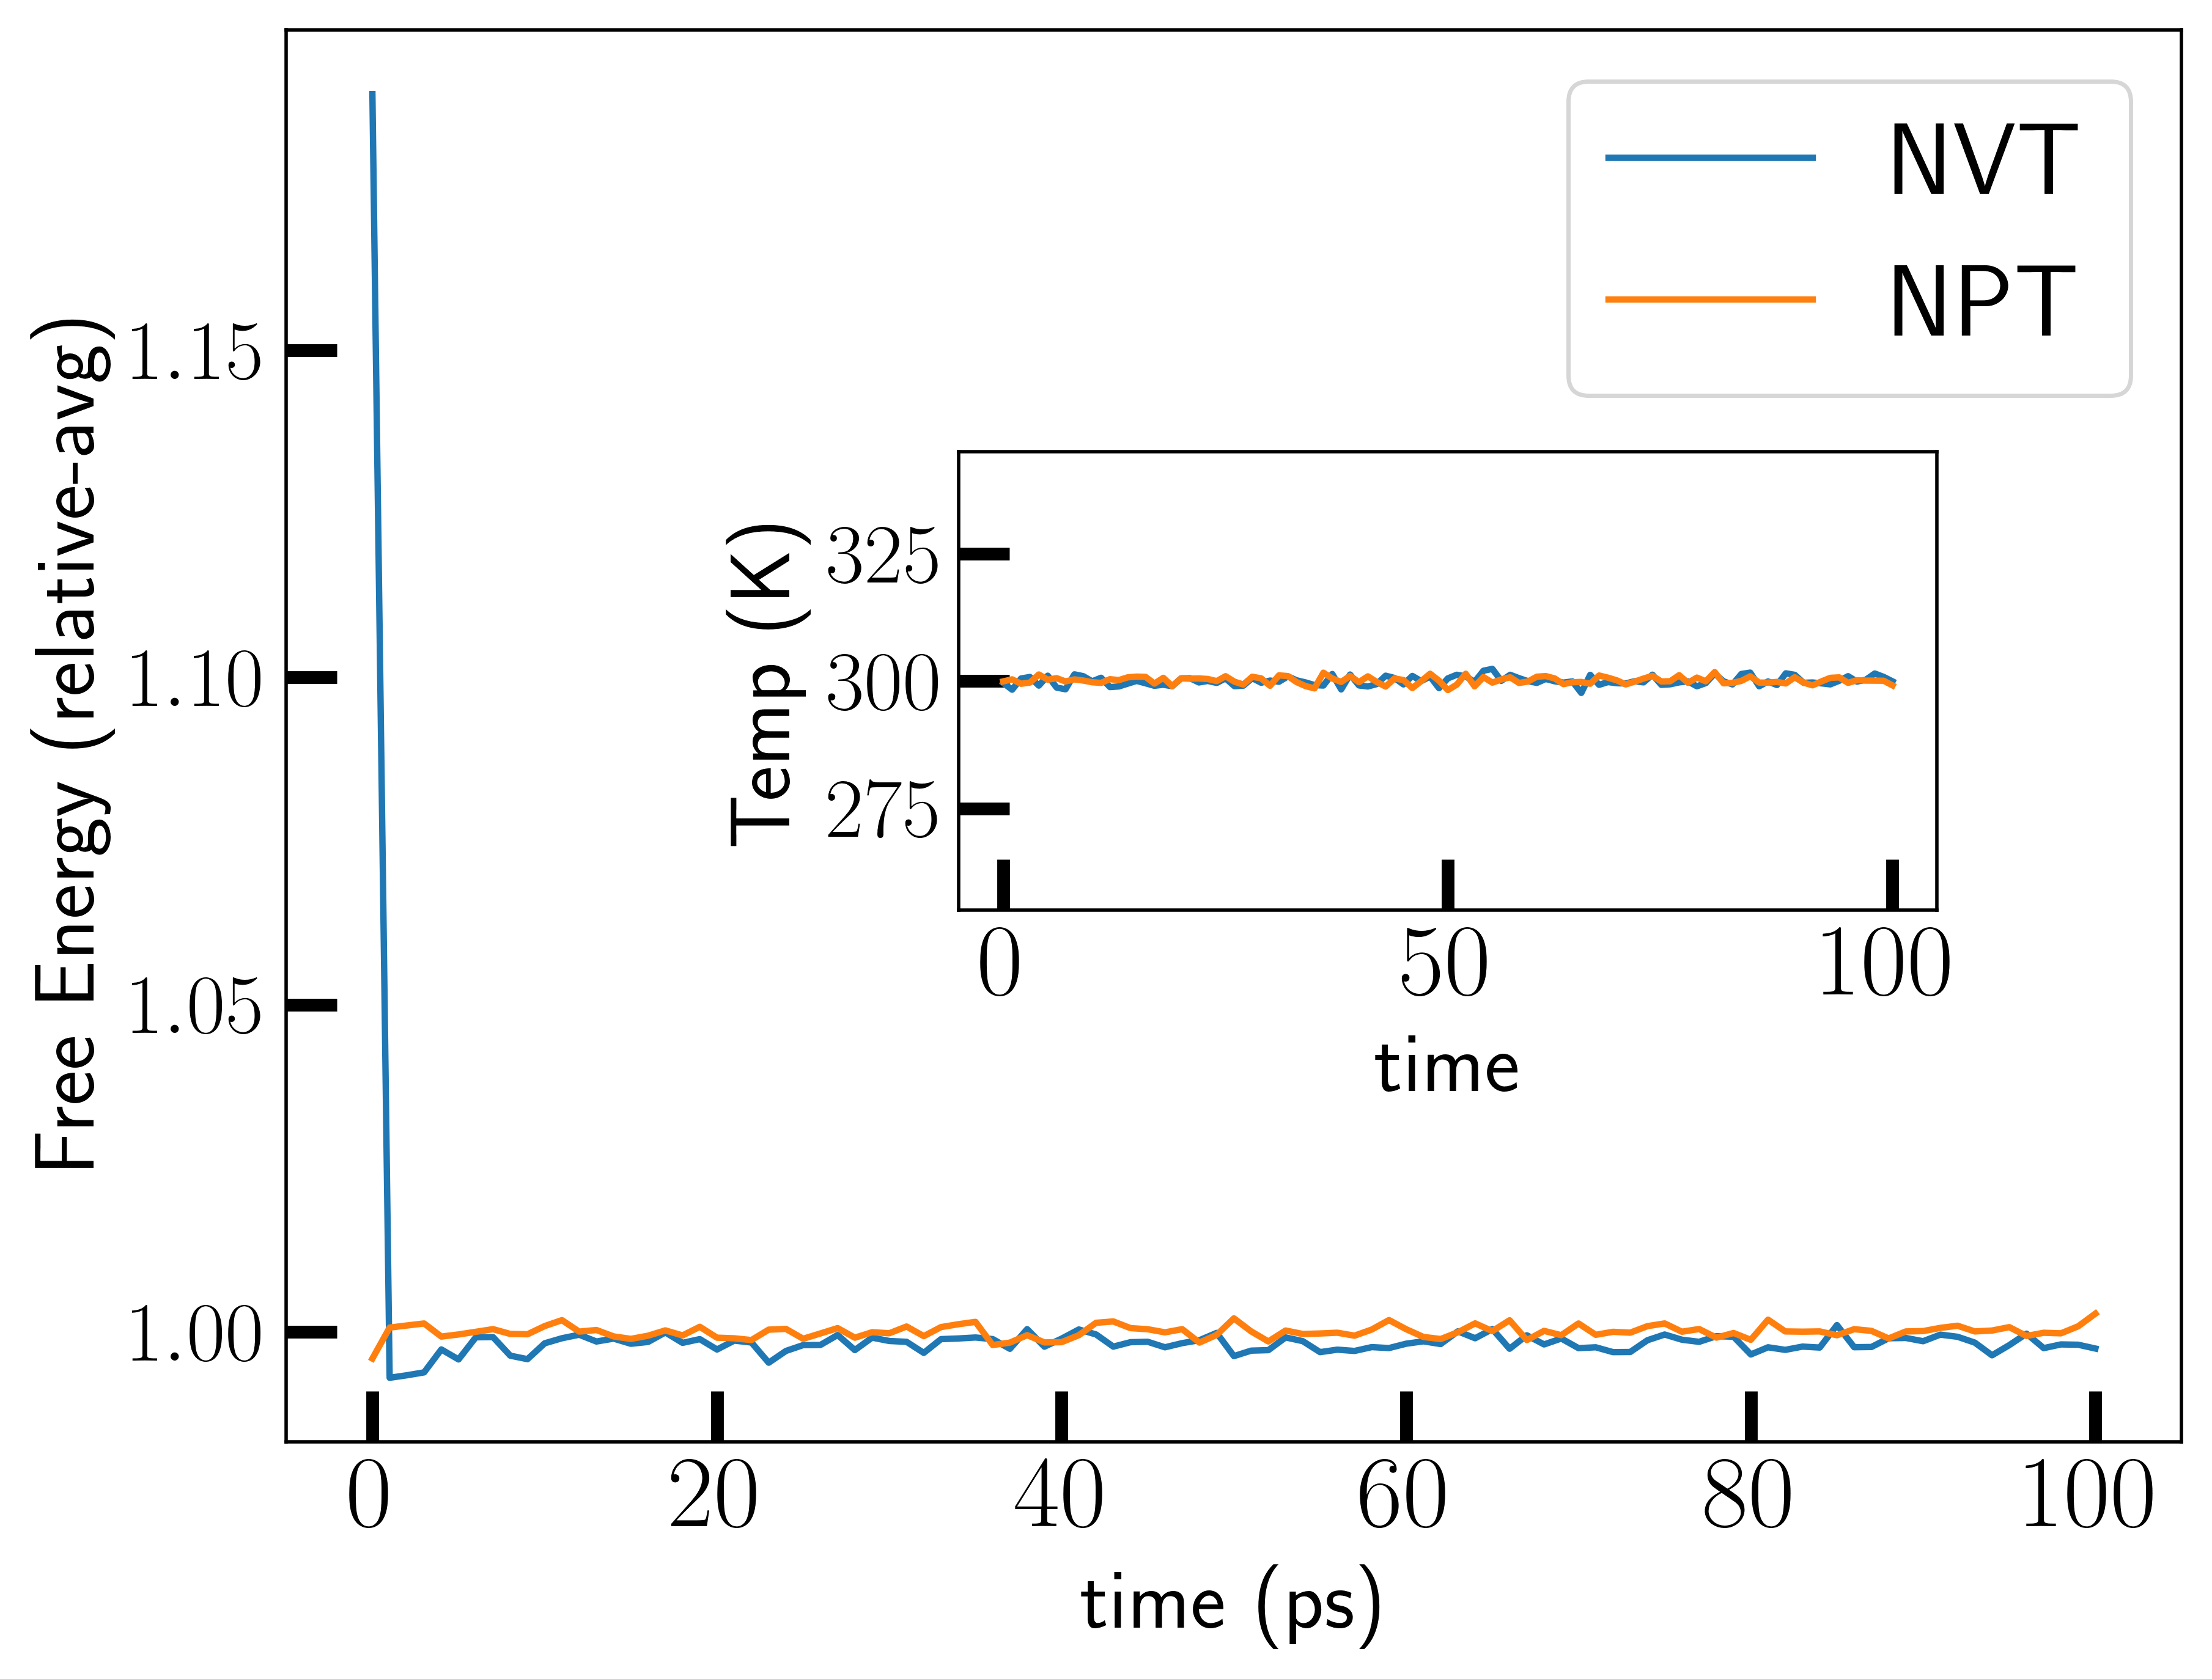

In [31]:
nvt_pfname = "nvt_pressure.xvg"  
nvt_tfname = "nvt_temperature.xvg"  
nvt_efname = "nvt_totalenergy.xvg"

t1, en = np.loadtxt(nvt_efname, comments=['#','@'], unpack=True)
en = en/np.average(en)

t2, tmp_nvt = np.loadtxt(nvt_tfname, comments=['#','@'], unpack=True)
t3, p = np.loadtxt(nvt_pfname, comments=['#','@'], unpack=True)

npt_rfname = "npt_density.xvg"  
npt_efname = "npt_enthalpy.xvg"  
npt_tfname = "npt_temperature.xvg"
t4, rho = np.loadtxt(npt_rfname, comments=['#','@'], unpack=True)
t5, enth = np.loadtxt(npt_efname, comments=['#','@'], unpack=True)
enth = enth/np.average(enth)
t6, tmp_npt = np.loadtxt(npt_tfname, comments=['#','@'], unpack=True)

fig, ax1 = plt.subplots(figsize=(8,6))
fig.set_tight_layout(False)

ax1.plot(t1, en, label='NVT')
ax1.plot(t5, enth, label='NPT')
ax1.set_xlabel('time (ps)')
ax1.set_ylabel('Free Energy (relative-avg)')
ax1.legend(loc='best')

left, bottom, width, height = [0.4, 0.4, 0.4, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(t2, tmp_nvt, label='NVT')
ax2.plot(t6, tmp_npt, label='NPT')
ax2.set_ylim((255,345))
ax2.set_xlabel('time')
ax2.set_ylabel('Temp (K)')

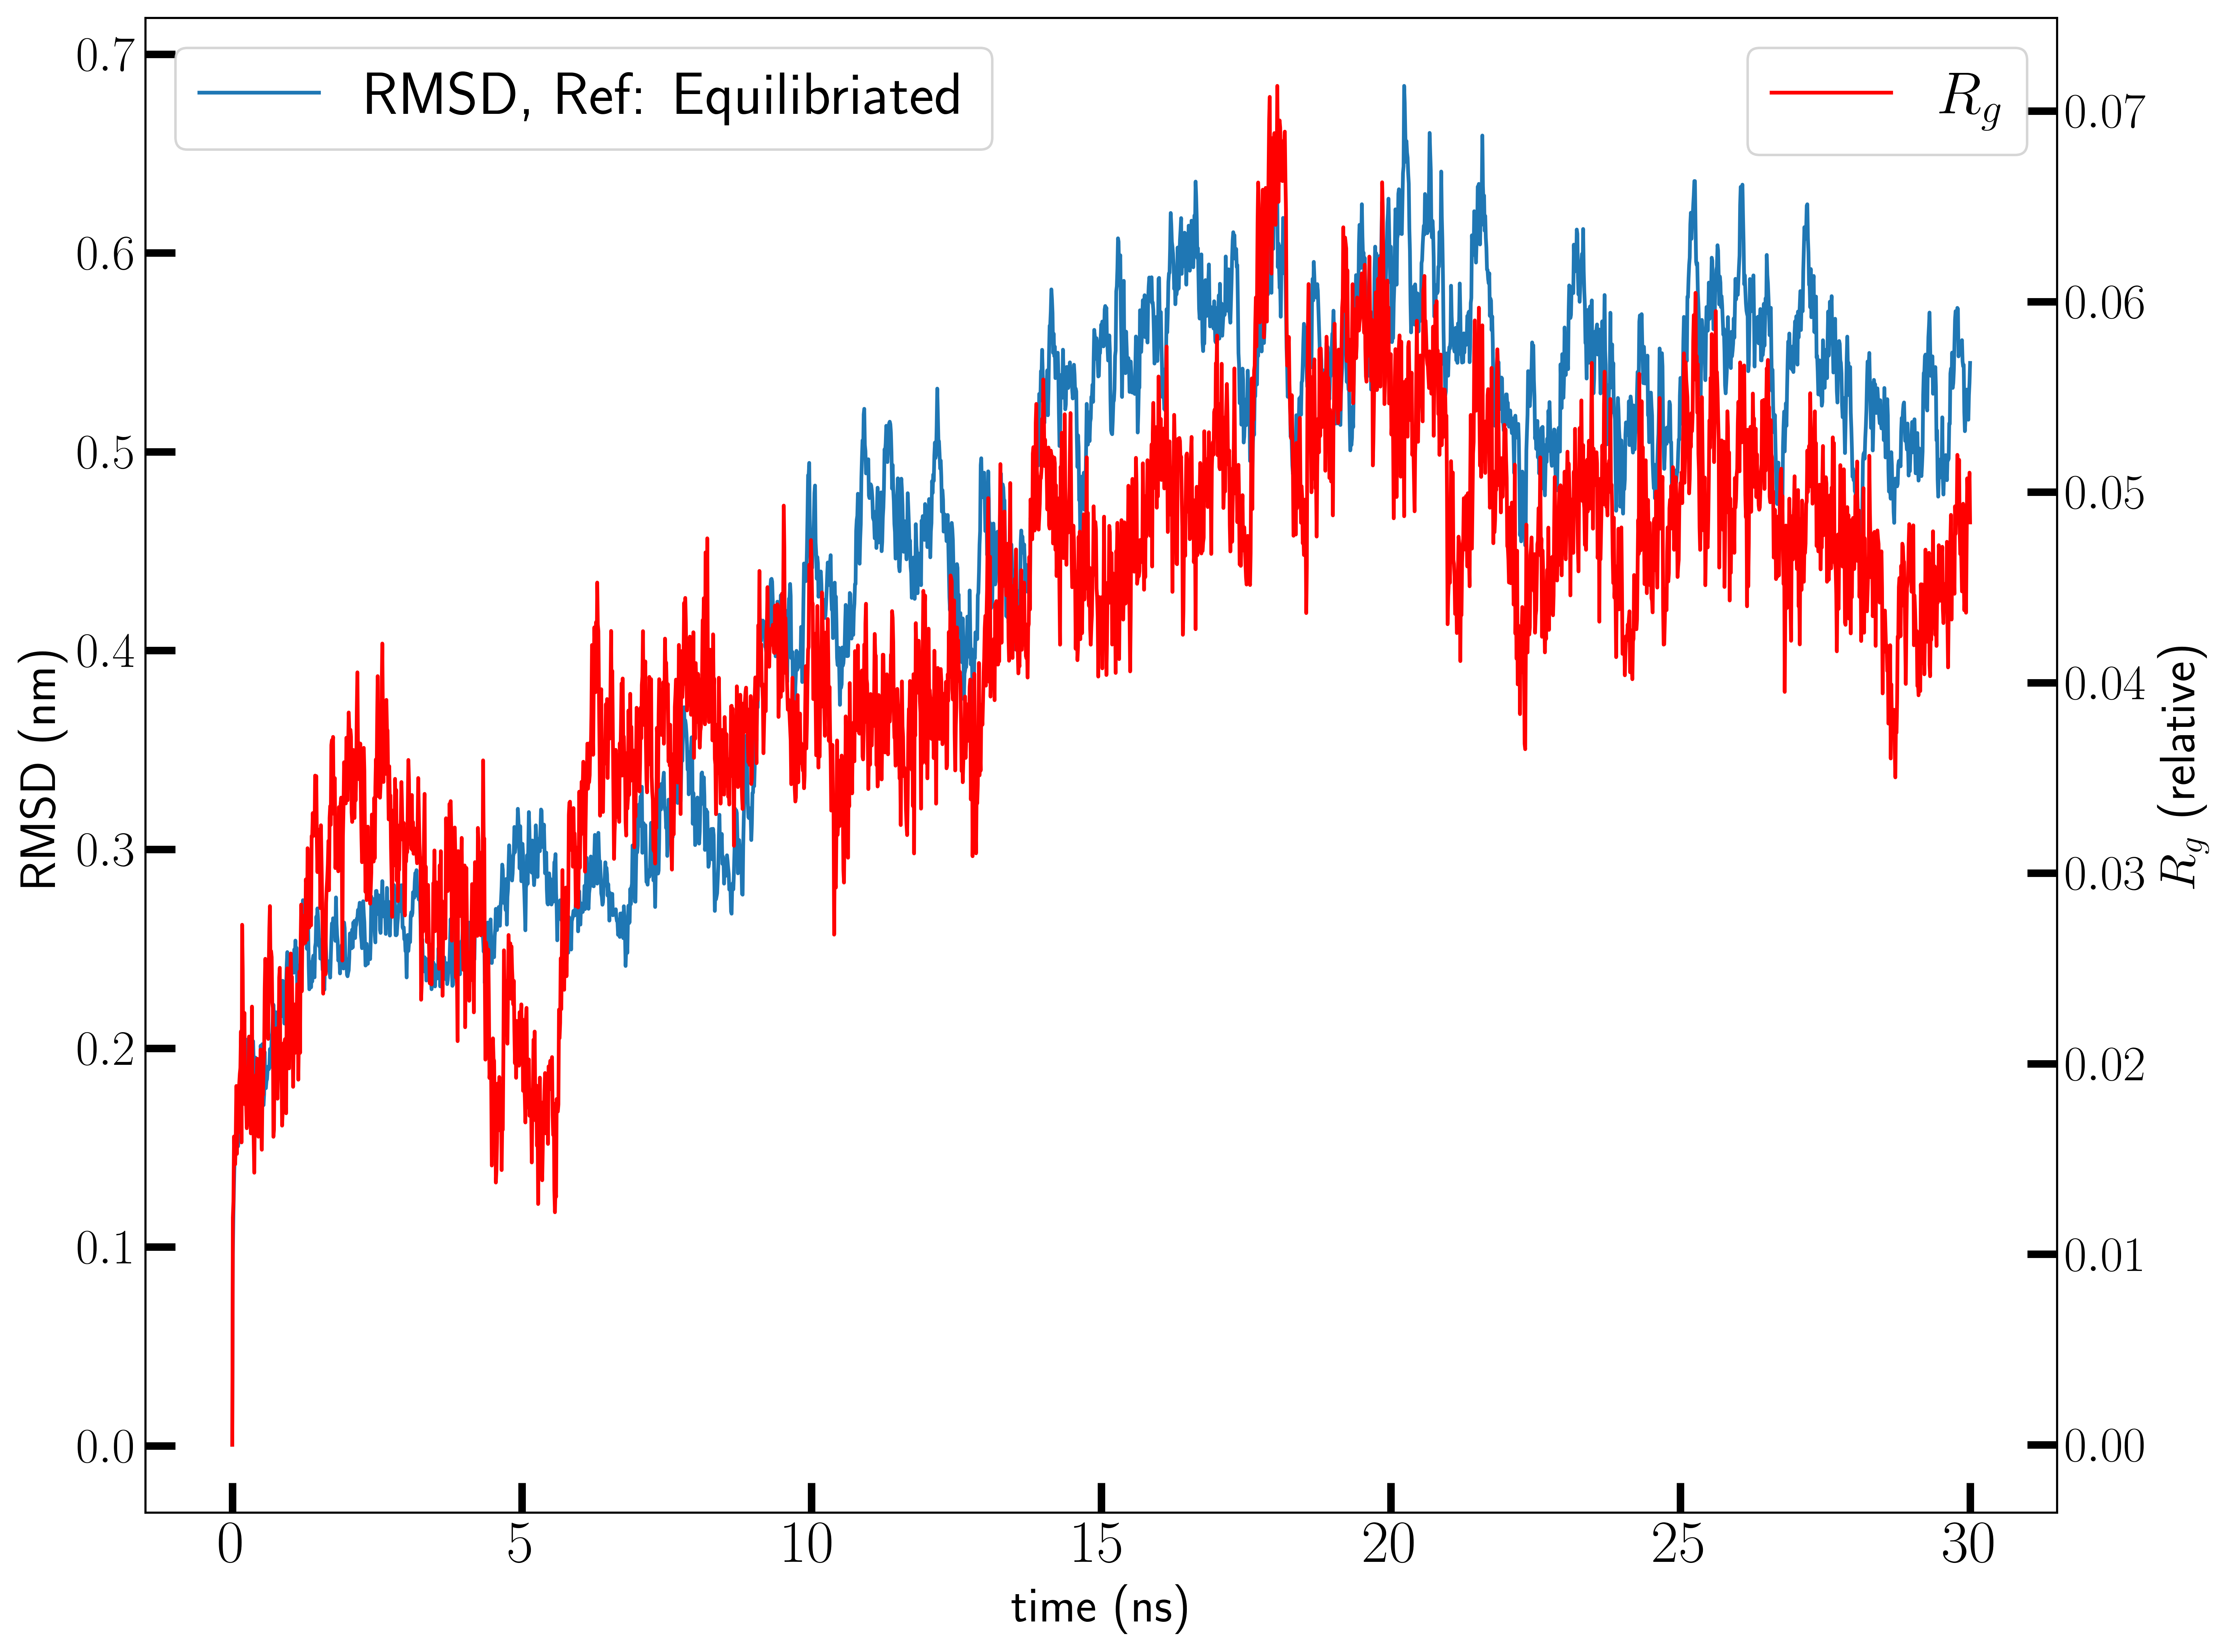

In [32]:
#gyrate_longer.xvg  md_rmsd_longer.xvg  md_rmsd_xtal_longer.xvg
import matplotlib
matplotlib.rc('font', size=20)
md_rmsfname = "md_rmsd_longer.xvg"
md_rmsxtalfname = "md_rmsd_xtal_longer.xvg"
md_gyrate = "gyrate_longer.xvg"

t1, rms = np.loadtxt(md_rmsfname, comments=['#','@'], unpack=True)
t2,rms_xtal = np.loadtxt(md_rmsfname, comments=['#','@'], unpack=True)
t3,rg, rgx, rgy, rgz = np.loadtxt(md_gyrate, comments=['#','@'], unpack=True)

fig, ax1 = plt.subplots()
ax1.plot(t1,rms, label="RMSD, Ref: Equilibriated")
ax1.legend(loc='upper left')
ax1.set_xlabel("time (ns)")
ax1.set_ylabel("RMSD (nm)")
ax2 = ax1.twinx()
ax2.plot(t3/1000, (rg-rg[0])/rg[0], label=r"$R_g$", color='red')
ax2.set_ylabel(r"$R_g$ (relative)")
ax2.legend(loc='upper right')